## This is the workbook for Pepperwood Climate Above Ground research
## Author Aji John

## To visualize temperature profile
Temperature probes at various heights 

In [1]:
# Load the Required Packages
library(raster)
library(leaflet)
library(jsonlite)
library(dplyr)
library(ggplot2)
library(plotly)
library(reshape2)

Loading required package: sp

Attaching package: ‘dplyr’

The following objects are masked from ‘package:raster’:

    intersect, select, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:raster’:

    select

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
# Get the metadata of the plots (comparision)
myurl <- "https://raw.githubusercontent.com/ajijohn/geiger/master/data/shield-comparison.txt"
download.file(url=myurl, destfile="./data/ArrayPlotPts.csv", method="wget")
ArrayPlotPts<- read.csv('./data/ArrayPlotPts.csv')
str(ArrayPlotPts)

'data.frame':	85 obs. of  4 variables:
 $ time   : Factor w/ 85 levels "2016/9/8 16:12:31",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ id     : Factor w/ 5 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 4 2 5 1 3 ...
 $ celsius: num  27.4 23.8 24.9 25.1 25.2 ...
 $ farenh : num  81.3 74.8 76.9 77.2 77.5 ...


'data.frame':	8282 obs. of  4 variables:
 $ time   : Factor w/ 8282 levels "2016/9/12 15:56:41",..: 1 2 3 4 5 6 7 10 11 12 ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...
'data.frame':	8282 obs. of  4 variables:
 $ time   : POSIXct, format: "2016-09-12 15:56:41" "2016-09-12 15:56:44" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...


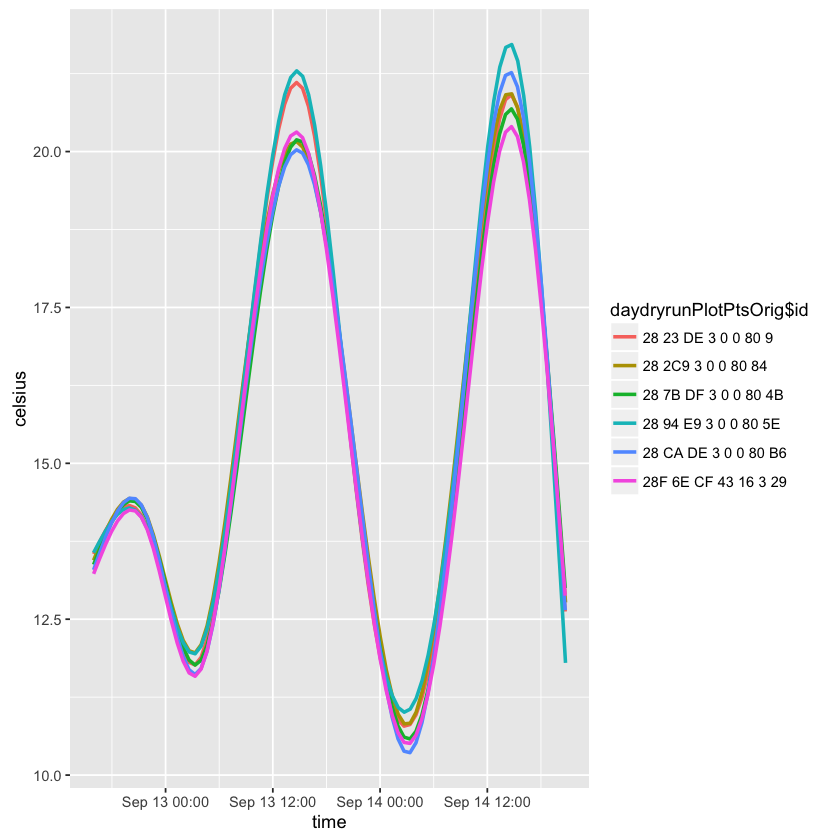

In [3]:
# Get the metadata of the plots (comparision)
myurl <- "https://raw.githubusercontent.com/ajijohn/geiger/master/data/2daydryrun.csv"
download.file(url=myurl, destfile="./data/daydryrun.csv", method="wget")
daydryrunPlotPtsOrig<- read.csv('./data/daydryrun.csv')
str(daydryrunPlotPtsOrig)

daydryrunPlotPtsOrig$time <-as.POSIXct(strptime(daydryrunPlotPtsOrig$time, "%Y/%m/%d %H:%M:%S"))
str(daydryrunPlotPtsOrig)
ggplot(daydryrunPlotPtsOrig, aes(time,celsius, color = daydryrunPlotPtsOrig$id)) + stat_smooth(se = FALSE) 

In [4]:
# Get the metadata of the plots (comparision)
#myurl <- "https://raw.githubusercontent.com/ajijohn/geiger/master/data/2-day-dryrun.txt"
#download.file(url=myurl, destfile="./data/daydryrun.csv", method="wget")
daydryrunPlotPts<- read.csv('./data/2-day.csv')
str(daydryrunPlotPts)
#format the date
daydryrunPlotPts$time <-as.POSIXct(strptime(daydryrunPlotPts$time, "%m/%d/%y %H:%M"))
str(daydryrunPlotPts)

'data.frame':	8282 obs. of  4 variables:
 $ time   : Factor w/ 1734 levels "9/12/16 15:56",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...
'data.frame':	8282 obs. of  4 variables:
 $ time   : POSIXct, format: "2016-09-12 15:56:00" "2016-09-12 15:56:00" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...


In [5]:


as.POSIXct(strptime(daydryrunPlotPts$time, "%m/%d/%y %H:%M"))

   [1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [25] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [73] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [97] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [121] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [145] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [193] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [217] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [241] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [289] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA 

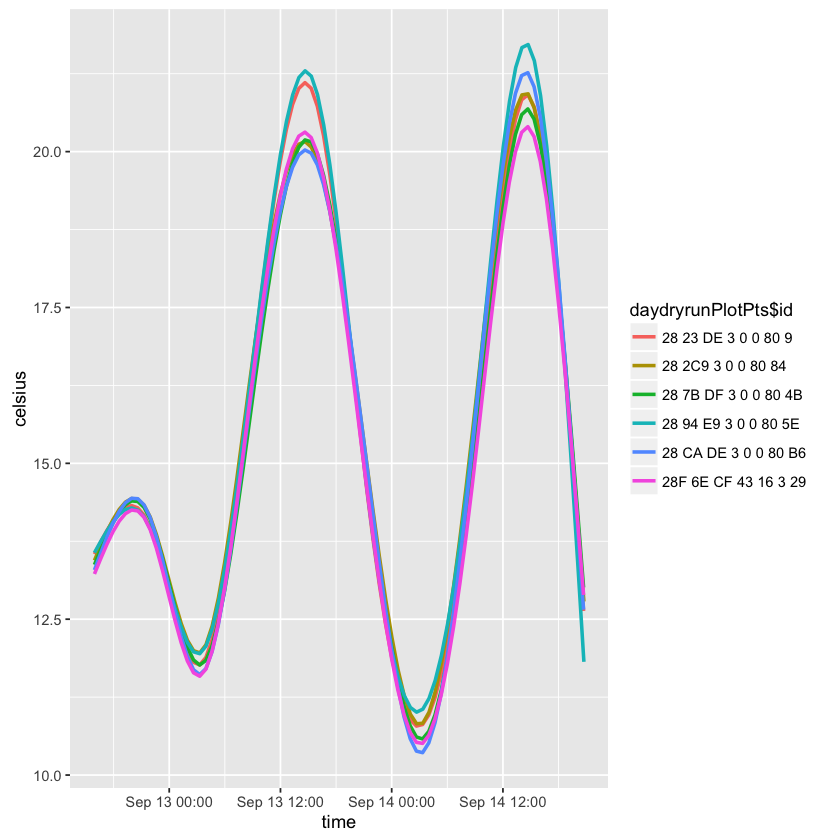

In [6]:
ggplot(daydryrunPlotPts, aes(time,celsius, color = daydryrunPlotPts$id)) + stat_smooth(se = FALSE) 

In [7]:
unique(daydryrunPlotPts$id)

[1] 28 94 E9 3 0 0 80 5E 28 2C9 3 0 0 80 84   28 CA DE 3 0 0 80 B6
[4] 28 23 DE 3 0 0 80 9  28 7B DF 3 0 0 80 4B 28F 6E CF 43 16 3 29
6 Levels: 28 23 DE 3 0 0 80 9 28 2C9 3 0 0 80 84 ... 28F 6E CF 43 16 3 29

In [8]:
#format the date
ArrayPlotPts$time <-as.POSIXct(ArrayPlotPts$time, "%Y/%m/%d %H:%M:%S")
str(ArrayPlotPts)

Warning message in strptime(xx, f <- "%Y-%m-%d %H:%M:%OS", tz = tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in strptime(xx, f <- "%Y/%m/%d %H:%M:%OS", tz = tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in strptime(x, f, tz = tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(as.POSIXlt(x, tz, ...), tz, ...):
“unknown timezone '%Y/%m/%d %H:%M:%S'”

'data.frame':	85 obs. of  4 variables:
 $ time   : POSIXct, format: 

Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”

"2016-09-08 16:12:31" "2016-09-08 16:12:34" ...
 $ id     : Factor w/ 5 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 4 2 5 1 3 ...
 $ celsius: num  27.4 23.8 24.9 25.1 25.2 ...
 $ farenh : num  81.3 74.8 76.9 77.2 77.5 ...


In [9]:
unique(ArrayPlotPts$id)
#Exposed probes: 5E, 9, 4B
#Inhouse shield: 84
#Commercial shield: B6

[1] 28 94 E9 3 0 0 80 5E 28 2C9 3 0 0 80 84   28 CA DE 3 0 0 80 B6
[4] 28 23 DE 3 0 0 80 9  28 7B DF 3 0 0 80 4B
5 Levels: 28 23 DE 3 0 0 80 9 28 2C9 3 0 0 80 84 ... 28 CA DE 3 0 0 80 B6

In [10]:
ArrayPlotPts %>% filter(id=='28 2C9 3 0 0 80 84')

Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”

time,id,celsius,farenh
2016-09-08 16:12:34,28 2C9 3 0 0 80 84,23.75,74.75
2016-09-08 16:17:44,28 2C9 3 0 0 80 84,21.87,71.37
2016-09-08 16:19:59,28 2C9 3 0 0 80 84,21.94,71.49
2016-09-08 16:22:13,28 2C9 3 0 0 80 84,20.62,69.12
2016-09-08 16:24:28,28 2C9 3 0 0 80 84,20.75,69.35
2016-09-08 16:26:42,28 2C9 3 0 0 80 84,21.31,70.36
2016-09-08 16:28:57,28 2C9 3 0 0 80 84,21.25,70.25
2016-09-08 16:31:12,28 2C9 3 0 0 80 84,21.31,70.36
2016-09-08 16:33:26,28 2C9 3 0 0 80 84,19.62,67.32
2016-09-08 16:35:41,28 2C9 3 0 0 80 84,19.31,66.76


In [11]:
levels(ArrayPlotPts$id) <- c('Exposed 1','Inhouse Shield','Exposed 2','Exposed 3','Commercial Shield')

In [12]:
#MD

In [ ]:
ggplot(ArrayPlotPts, aes(time,celsius, color = ArrayPlotPts$id)) + geom_line()



Warning message in as.POSIXlt.POSIXct(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXlt.POSIXct(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(from):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(from):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”